In [39]:
import pandas as pd
import numpy as np
from env import get_db_url
import wrangle_zillow, wrangle_mall
import seaborn as sns

In [32]:
df = wrangle_zillow.wrangle_zillow()

Using cached data


In [33]:
df.shape

(77380, 61)

In [34]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77380 entries, 0 to 77379
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          77380 non-null  int64  
 1   parcelid                    77380 non-null  int64  
 2   basementsqft                50 non-null     float64
 3   bathroom                    77380 non-null  float64
 4   bedroom                     77380 non-null  float64
 5   condition                   49671 non-null  float64
 6   calculatedbathnbr           76771 non-null  float64
 7   decktypeid                  614 non-null    float64
 8   finishedfloor1squarefeet    6023 non-null   float64
 9   square_feet                 77184 non-null  float64
 10  finishedsquarefeet12        73748 non-null  float64
 11  finishedsquarefeet13        41 non-null     float64
 12  finishedsquarefeet15        3009 non-null   float64
 13  finishedsquarefeet50        602

,id,parcelid,basementsqft,bathroom,bedroom,condition,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,square_feet,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,tax_value,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,7.738000e+04,7.738000e+04,50.000000,77380.000000,77380.000000,49671.000000,76771.000000,614.0,6023.000000,77184.000000,...,17560.000000,172.0,7.726800e+04,7.737900e+04,77380.0,7.737800e+04,77375.000000,2886.000000,7.713600e+04,77380.000000
mean,1.495126e+06,1.300715e+07,679.720000,2.299134,3.053489,6.534638,2.316871,66.0,1366.512535,1785.229465,...,1.434738,1.0,1.893160e+05,4.901375e+05,2016.0,3.010969e+05,5995.566592,14.087318,6.049674e+13,0.016628
std,8.609057e+05,3.481368e+06,689.703546,0.996657,1.139103,1.721933,0.979761,0.0,671.308125,954.051796,...,0.544569,0.0,2.300886e+05,6.534477e+05,0.0,4.925990e+05,7622.887460,2.185663,1.535252e+12,0.170190
min,3.490000e+02,1.071186e+07,38.000000,0.000000,0.000000,1.000000,1.000000,66.0,44.000000,128.000000,...,1.000000,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,-4.655420
25%,7.520500e+05,1.153830e+07,273.000000,2.000000,2.000000,6.000000,2.000000,66.0,955.000000,1182.000000,...,1.000000,1.0,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.585000,14.000000,6.037311e+13,-0.024377
50%,1.497870e+06,1.253155e+07,515.000000,2.000000,3.000000,6.000000,2.000000,66.0,1257.000000,1543.000000,...,1.000000,1.0,1.364995e+05,3.589760e+05,2016.0,2.033835e+05,4450.720000,15.000000,6.037603e+13,0.006627
75%,2.240480e+06,1.421184e+07,796.500000,3.000000,4.000000,8.000000,3.000000,66.0,1615.000000,2113.000000,...,2.000000,1.0,2.187875e+05,5.690030e+05,2016.0,3.668022e+05,6927.800000,15.000000,6.059042e+13,0.039204
max,2.982274e+06,1.676893e+08,3560.000000,18.000000,16.000000,12.000000,18.000000,66.0,6912.000000,35640.000000,...,6.000000,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,5.262999


### Remove any properties that are not single unit. Don't want to lose all the nans

In [5]:
df.unitcnt[(df.unitcnt==1)|(df.unitcnt.isna())].value_counts(dropna=False)

1.0    47292
NaN    26818
Name: unitcnt, dtype: int64

In [6]:
# Filter out anything other than unit count = 1 and nans
# df = df[(df.unitcnt==1)|(df.unitcnt.isna())]

In [7]:
# # Keep properties that should be single units
# properties_to_keep = ['Single Family Residential','Condominum','Mobile Home','Manufactured, Modular, Prefabricated Homes','Residential General','Townhouse',np.nan]
# df = df[df.apply(lambda row: row.propertylandusedesc in properties_to_keep, axis=1)]
# df.propertylandusedesc.value_counts(dropna=False)

In [8]:
# df = wrangle_zillow.handle_missing_zillow_values(df)

### Functions to drop rows or columns based on percent of values that are missing

In [35]:
wrangle_zillow.nulls_by_column(df)

,n_rows_missing,pct_rows_missing
buildingclassdesc,77365,0.999806
finishedsquarefeet13,77339,0.999470
basementsqft,77330,0.999354
storydesc,77330,0.999354
yardbuildingsqft26,77310,0.999095
...,...,...
propertycountylandusecode,0,0.000000
parcelid,0,0.000000
roomcnt,0,0.000000
rawcensustractandblock,0,0.000000


# Takeaways from nulls by column:
- For some (especially binary or few categories) may be able to assume null means 0:
    - check nunique and fillna with 0
- May want to see if any specific category is overrepresenting with nulls. Should fill these nas with a value (like 'unavailable') so the rest of the information is not dropped
    - Like one county didn't have any condition information
- After that may want to drop columns with >90% nulls

In [10]:
wrangle_zillow.nulls_by_row(df)

,num_cols_missing,pct_cols_missing,num_rows
0,28,0.459016,20660
1,29,0.475410,16097
2,27,0.442623,12410
3,26,0.426230,7996
4,30,0.491803,6391
5,25,0.409836,5768
6,31,0.508197,3604
7,32,0.524590,2089
8,24,0.393443,660
9,23,0.377049,599


# Takeaway from nulls by row
- Should fix issues from nulls by column first - this might lower the nulls by row values
- seems like removing any rows with >60% of missing columns would affect fairly minimal amount

In [11]:
df_nulls_removed = wrangle_zillow.handle_missing_values(df, prop_required_column=0.3, prop_required_row=0.00002)

(77380, 61)  original shape
(77380, 61)  shape after dropping columns with prop required rows below theshold
(77380, 61)  shape after dropping rows with prop required columns below threshold


In [12]:
wrangle_zillow.nulls_by_column(df_nulls_removed)

,n_rows_missing,pct_rows_missing
buildingclassdesc,77365,0.999806
finishedsquarefeet13,77339,0.999470
basementsqft,77330,0.999354
storydesc,77330,0.999354
yardbuildingsqft26,77310,0.999095
...,...,...
propertycountylandusecode,0,0.000000
parcelid,0,0.000000
roomcnt,0,0.000000
rawcensustractandblock,0,0.000000


In [13]:
wrangle_zillow.nulls_by_row(df_nulls_removed)

,num_cols_missing,pct_cols_missing,num_rows
0,28,0.459016,20660
1,29,0.475410,16097
2,27,0.442623,12410
3,26,0.426230,7996
4,30,0.491803,6391
5,25,0.409836,5768
6,31,0.508197,3604
7,32,0.524590,2089
8,24,0.393443,660
9,23,0.377049,599


### Many of the null values remaining are the result of the binary case of 0 or none - such as "hashottuborspa." The only option for many of these are either have it or not, where the "not" option is NaN. Better to fill these in as 0 or None rather than drop them outright. 

In [14]:
for col in df_nulls_removed.columns:
    if df_nulls_removed[col].nunique() == 1:
        print(col)
        print(df_nulls_removed[col].value_counts(dropna=False))
        df_nulls_removed[col] = df_nulls_removed[col].fillna('None')

decktypeid
NaN     76766
66.0      614
Name: decktypeid, dtype: int64
hashottuborspa
NaN    75842
1.0     1538
Name: hashottuborspa, dtype: int64
pools
NaN    61243
1.0    16137
Name: pools, dtype: int64
pooltypeid10
NaN    76916
1.0      464
Name: pooltypeid10, dtype: int64
pooltypeid2
NaN    76306
1.0     1074
Name: pooltypeid2, dtype: int64
pooltypeid7
NaN    62338
1.0    15042
Name: pooltypeid7, dtype: int64
fireplaceflag
NaN    77208
1.0      172
Name: fireplaceflag, dtype: int64
assessmentyear
2016.0    77380
Name: assessmentyear, dtype: int64
taxdelinquencyflag
NaN    74494
Y       2886
Name: taxdelinquencyflag, dtype: int64
storydesc
NaN         77330
Basement       50
Name: storydesc, dtype: int64


In [15]:
wrangle_zillow.nulls_by_column(df_nulls_removed)

,n_rows_missing,pct_rows_missing
buildingclassdesc,77365,0.999806
finishedsquarefeet13,77339,0.999470
basementsqft,77330,0.999354
yardbuildingsqft26,77310,0.999095
architecturalstyledesc,77174,0.997338
...,...,...
rawcensustractandblock,0,0.000000
parcelid,0,0.000000
propertycountylandusecode,0,0.000000
pooltypeid7,0,0.000000


### With the binary cases handled, now moving onto those with more categories. 
- For many of the columns with "desc" in the name, should replace NaN with not-specified
- If cnt or number in the name, probably safe to fill nan with 0


In [16]:
for col in df_nulls_removed.columns:
    if 'desc' in col:
        # print(df[col].value_counts(dropna=False))
        df_nulls_removed[col] = df_nulls_removed[col].fillna('Not Specified')
    elif 'cnt' in col:
        df_nulls_removed[col] = df_nulls_removed[col].fillna(0)
    elif 'number' in col:
        df_nulls_removed[col] = df_nulls_removed[col].fillna(0)

In [17]:
for col in df_nulls_removed.columns:
    if (df_nulls_removed[col].nunique() < 15) & (df_nulls_removed[col].nunique() > 2) & (df_nulls_removed[col].isna().sum()>0):
        print(col)
        print(df_nulls_removed[col].value_counts(dropna=False))
        # df[col] = df[col].fillna('None')

condition
NaN     27709
8.0     14645
6.0     13462
4.0      9482
7.0      5971
9.0      2299
5.0      2088
11.0      931
3.0       329
10.0      313
12.0      116
1.0        26
2.0         9
Name: condition, dtype: int64
finishedsquarefeet13
NaN       77339
1440.0       18
1344.0        5
1536.0        3
1488.0        3
1152.0        2
1392.0        2
1248.0        2
1056.0        1
1300.0        1
1560.0        1
1512.0        1
1060.0        1
1200.0        1
Name: finishedsquarefeet13, dtype: int64
garage
NaN     51906
2.0     18608
1.0      5676
3.0       632
4.0       255
0.0       230
5.0        45
6.0        14
7.0         4
10.0        3
8.0         2
9.0         2
11.0        1
13.0        1
14.0        1
Name: garage, dtype: int64
threequarterbathnbr
NaN    67284
1.0    10012
2.0       75
3.0        8
7.0        1
Name: threequarterbathnbr, dtype: int64
taxdelinquencyyear
NaN     74494
15.0     1552
14.0      799
13.0      183
12.0      113
11.0       98
10.0       66
9.0   

### Remaining columns must be dealt with individually
- garage and threequarterbathnbr: fill nas with 0
- garagetotalsqft: no garage
- basementsqft: no basement information
- poolsizesum: no pool
- taxdelinquencyyear: fill with "Assumed not delinquent"
- condition: not available
- yardbuildingsqft17: no patio information
- yardbuildingsqft26: no yard building
- drop finishedsquarefeet13,50,6 and finishedfloor1squarefeet. Drop finishedsquarefeet12 - looks to be equal to square footage
- drop calculatedbathnbr, redundant

In [18]:
df_nulls_removed['garage'] = df_nulls_removed['garage'].fillna(0)
df_nulls_removed['garagetotalsqft'] = df_nulls_removed['garagetotalsqft'].fillna('No garage')
df_nulls_removed['poolsizesum'] = df_nulls_removed['poolsizesum'].fillna('No pool')
df_nulls_removed['basementsqft'] = df_nulls_removed['basementsqft'].fillna('No basement information')
df_nulls_removed['threequarterbathnbr'] = df_nulls_removed['threequarterbathnbr'].fillna(0)
df_nulls_removed['taxdelinquencyyear'] = df_nulls_removed['taxdelinquencyyear'].fillna("Assumed Not Delinquent")
df_nulls_removed['condition'] = df_nulls_removed['condition'].fillna("Not available")
df_nulls_removed['yardbuildingsqft17'] = df_nulls_removed['yardbuildingsqft17'].fillna("No Patio Information")
df_nulls_removed['yardbuildingsqft26'] = df_nulls_removed['yardbuildingsqft26'].fillna("No Yard Building")
df_nulls_removed = df_nulls_removed.drop(columns = ['calculatedbathnbr','finishedsquarefeet13','finishedsquarefeet50','finishedsquarefeet6','finishedsquarefeet12','finishedfloor1squarefeet'])

In [19]:
for col in df_nulls_removed.columns:
    if df_nulls_removed[col].isna().sum()>0:
        print(col, df_nulls_removed[col].isna().sum())
        df_nulls_removed[col].value_counts(dropna=False)

square_feet 196
finishedsquarefeet15 74371
lot_size 8239
regionidcity 1471
regionidneighborhood 46490
zip 50
yearbuilt 263
tax_value 1
taxamount 5
censustractandblock 244


In [20]:
df_nulls_removed.shape

(77380, 55)

In [21]:
df_nulls_removed.drop(columns = ['regionidneighborhood']).dropna().shape

(2946, 54)

In [22]:
df_nulls_removed[df_nulls_removed.regionidneighborhood.isna()].regionidcity.value_counts(dropna=False)

5534.0      1912
40227.0     1590
NaN         1471
25218.0     1353
27110.0     1107
            ... 
118880.0       5
13311.0        5
10815.0        4
36078.0        1
21395.0        1
Name: regionidcity, Length: 169, dtype: int64

In [23]:
df.shape

(77380, 61)

In [24]:
df = wrangle_zillow.handle_missing_zillow_values(df)

(52463, 61)  original shape
(52463, 59)  shape after dropping columns with prop required rows below theshold
(52463, 59)  shape after dropping rows with prop required columns below threshold


# Mall customers

In [25]:
# query = """ SELECT * FROM customers; """

In [26]:
# mall = pd.read_sql(query, get_db_url('mall_customers'))

In [41]:
mall = wrangle_mall.acquire_mall()

Using cached data


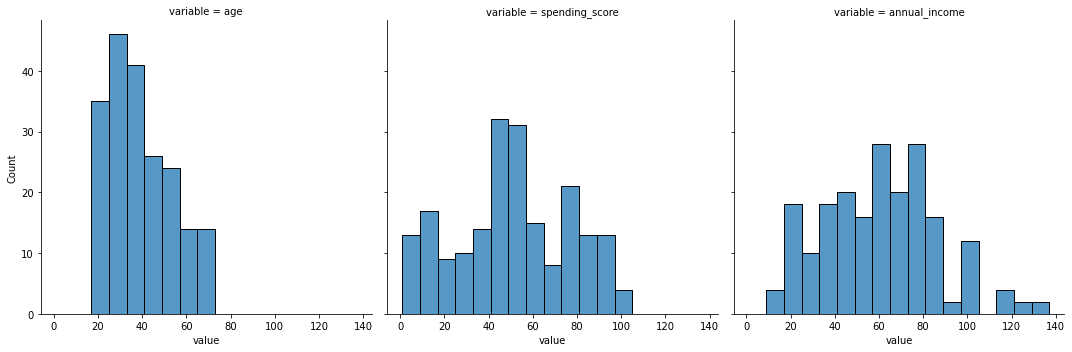

In [44]:
sns.displot(data=mall[['age', 'spending_score', 'annual_income']].melt(), col='variable', x='value')

In [29]:
train, validate, test = wrangle_mall.wrangle_mall()

Using cached data
Data split as follows: Train 56.00%, Validate 24.00%, Test 20.00%


In [30]:
train.describe()

,customer_id,age,annual_income,spending_score,gender_Male,age_scaled,annual_income_scaled,spending_score_scaled
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,99.339286,38.419643,60.250000,52.035714,0.383929,0.392685,0.370902,0.542933
std,57.293075,14.593988,26.364903,24.164947,0.488527,0.280654,0.216106,0.257074
min,1.000000,18.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,49.500000,27.000000,40.000000,35.750000,0.000000,0.173077,0.204918,0.369681
50%,101.000000,35.500000,61.500000,50.000000,0.000000,0.336538,0.381148,0.521277
75%,148.250000,48.000000,77.250000,73.250000,1.000000,0.576923,0.510246,0.768617
max,200.000000,70.000000,137.000000,95.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
mall.info()

In [ ]:
mall.head()

No missing values

In [ ]:
# train, validate, test = wrangle_mall.split_data(mall)

In [ ]:
# train_scaled, validate_scaled, test_scaled = wrangle_mall.scale_data(train, validate, test, ['age','annual_income','spending_score'])